# Fraudulent Activities - PART I

### OBJECTIF

Les sites de E-commerce font transiter beaucoup d'argent. Cela peut engendrer des risques non négligeables d'activités frauduleuses, comme l'utilisation de carte de crédit volées, du blanchiment d'argent, etc.

Fort heureusement, le Machine Learning peut nous aider à identifier ces activités frauduleuses. Tous les sites web où vous devez entrer vos informations de paiements ont une équipe qui s'occupe de gérer les risques de fraude via le ML.

Le but de ce challenge est de construire un modèle qui vous permet de prédire une probabilité de transaction frauduleuse.

### DESCRIPTION

L'entreprise X fait du E-commerce et vend des vêtements faits-main. Votre but est de construire un modèle qui permette de prédire si l'achat d'un vêtement doit être considéré comme une transaction frauduleuse ou non.

Voici précisément ce que vous devez faire :

1. Pour chacun des utilisateurs, déterminez le pays d'origine depuis son adresse IP

2. Construisez un modèle qui permette de prédire si l'activité est frauduleuse ou non. Expliquez aussi vos choix / hypothèses en termes d'optimisation de faux-positifs et faux-négatifs

3. Votre patron aimerait comprendre votre modèle car il est inquiet d'utiliser un modèle _black box_. Comment l'expliqueriez vous d'un point utilisateur, et non pas mathématique. Par exemple, quels sont les utilisateurs qui peuvent être classés comme _risqués_ ?

4. Supposons que vous pouvez utiliser votre modèle en live pour qu'il fasse sa prédiction en temps réel. D'un point de vue Produit, comment l'utiliseriez-vous ? Comment pourriez-vous penser l'expérience utilisateur face à ce produit ?


### DATA

Vous pouvez utiliser les deux tables suivantes :

```python
Fraud_Data
```

&

```python
IpAddress_to_Country
```


## Imports des librairies et datasets

In [94]:
# Import des librairies

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install s3fs

  Using cached s3fs-0.5.2-py3-none-any.whl (22 kB)
Processing /home/jovyan/.cache/pip/wheels/42/90/c4/27e5ea0e7285ff42d4f7e696d22ddf5077480fdd4bb839b6fb/aiobotocore-1.2.1-py3-none-any.whl
  Using cached botocore-1.19.52-py2.py3-none-any.whl (7.2 MB)
  Using cached aiohttp-3.7.3-cp38-cp38-manylinux2014_x86_64.whl (1.5 MB)
Processing /home/jovyan/.cache/pip/wheels/5f/fd/9e/b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73/wrapt-1.12.1-cp38-cp38-linux_x86_64.whl
  Using cached aioitertools-0.7.1-py3-none-any.whl (20 kB)
  Using cached jmespath-0.10.0-py2.py3-none-any.whl (24 kB)
  Using cached async_timeout-3.0.1-py3-none-any.whl (8.2 kB)
  Using cached yarl-1.6.3-cp38-cp38-manylinux2014_x86_64.whl (324 kB)
  Using cached multidict-5.1.0-cp38-cp38-manylinux2014_x86_64.whl (159 kB)


In [95]:
# Import des datatsets

df1 = pd.read_csv("s3://full-stack-bigdata-datasets/Machine Learning Supervisé/projects/fraudulent_activity/Fraud_Data.csv")
ip_country = pd.read_csv("s3://full-stack-bigdata-datasets/Machine Learning Supervisé/projects/fraudulent_activity/IpAddress_to_Country.csv")

## Exploration des datasets

In [96]:
# Affichage des premières colonnes du dataset "df1"

df1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [97]:
# Affichage des premières colonnes du dataset "ip_country"

ip_country.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [71]:
# Affichage du nombre ed lignes et de colonnes des 2 datasets

df1.shape

(151112, 11)

In [7]:
ip_country.shape

(138846, 3)

In [8]:
# Affichage du type de chaque colonne des datasets

df1.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

In [9]:
ip_country.dtypes

lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object

In [98]:
# Transformation des colonnes "signup_time" et "purchase_time" au format "datetime"

df1["signup_time"] = pd.to_datetime(df1["signup_time"], format = "%Y-%m-%d %H:%M:%S")
df1["purchase_time"] = pd.to_datetime(df1["purchase_time"], format = "%Y-%m-%d %H:%M:%S")

In [99]:
# Affichage des valeures manquantes en pourcentage pour les 2 datasets

display(100*df1.isnull().sum()/df1.shape[0])

user_id           0.0
signup_time       0.0
purchase_time     0.0
purchase_value    0.0
device_id         0.0
source            0.0
browser           0.0
sex               0.0
age               0.0
ip_address        0.0
class             0.0
dtype: float64

In [100]:
display(100*ip_country.isnull().sum()/ip_country.shape[0])

lower_bound_ip_address    0.0
upper_bound_ip_address    0.0
country                   0.0
dtype: float64

In [101]:
# On détermine le nombre de transactions frauduleuses

df1["class"].value_counts()
print("Le nombre de transactions frauduleuses est : {}".format(df1["class"].value_counts()[1]))
a = round(df1['class'].value_counts()[1]/df1['class'].count()*100, 2)
print("Le pourcentage de transactions frauduleuses est : {}%".format(a))

Le nombre de transactions frauduleuses est : 14151
Le pourcentage de transactions frauduleuses est : 9.36%


## Réponses aux questions

#### 1. Pour chacun des utilisateurs, déterminez le pays d'origine depuis son adresse IP

In [102]:
def transform_ip(arg):
    try:
        return ip_country.country[(ip_country.lower_bound_ip_address < arg) & (ip_country.upper_bound_ip_address > arg)].iloc[0]  
    except IndexError:
        return "Unknown country"
df1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [103]:
df1 = df1.sample(10000)
ip_country = ip_country.sample(10000)

In [104]:
%time df1["country_name"] = df1.ip_address.apply(transform_ip)

CPU times: user 5.56 s, sys: 0 ns, total: 5.56 s
Wall time: 5.58 s


### Quelques analyses graphiques et Data Cleaning

In [105]:
df1['target'] = df1['class']
df1 = df1.drop(['class'], axis=1)

In [106]:
df1 = df1.drop(['user_id','ip_address', 'device_id'], axis=1)

<AxesSubplot:xlabel='browser', ylabel='Count'>

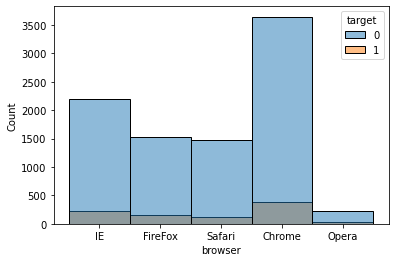

In [80]:
sns.histplot(x = 'browser', data = df1, hue = 'target')

<AxesSubplot:xlabel='signup_time', ylabel='Count'>

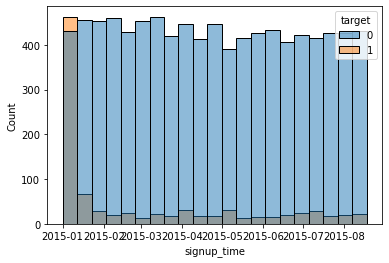

In [81]:
sns.histplot(x = 'signup_time', data = df1, hue = 'target')

<AxesSubplot:xlabel='source', ylabel='count'>

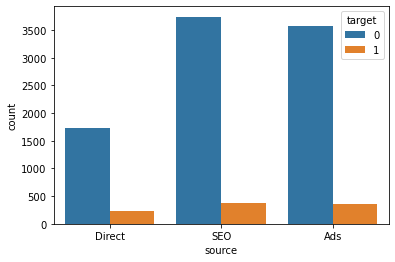

In [24]:
sns.countplot(x = 'source', data = df1, hue = 'target')

<AxesSubplot:xlabel='browser', ylabel='count'>

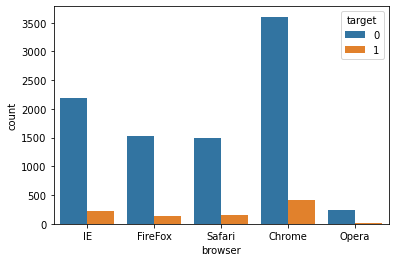

In [25]:
sns.countplot(x = 'browser', data = df1, hue = 'target')

<AxesSubplot:xlabel='sex', ylabel='count'>

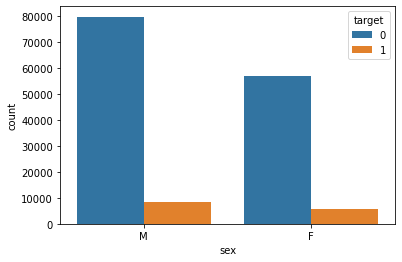

In [25]:
sns.countplot(x = 'sex', data = df1, hue = 'target')

<AxesSubplot:xlabel='age', ylabel='count'>

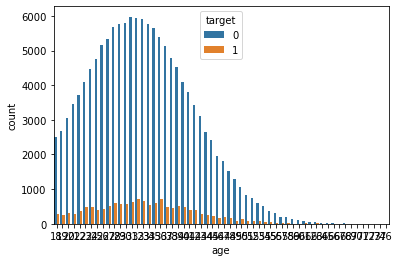

In [26]:
sns.countplot(x = 'age', data = df1, hue = 'target')

In [107]:
df1['year_purchase'] = pd.DatetimeIndex(df1['purchase_time']).year
df1['month_purchase'] = pd.DatetimeIndex(df1['purchase_time']).month
df1['day_purchase'] = pd.DatetimeIndex(df1['purchase_time']).day
df1['hour_purchase'] = pd.DatetimeIndex(df1['purchase_time']).hour
df1['min_purchase'] = pd.DatetimeIndex(df1['purchase_time']).minute
df1['second_purchase'] = pd.DatetimeIndex(df1['purchase_time']).second

df1 = df1.drop(['signup_time' , 'purchase_time'], axis=1)

df1.head()

,purchase_value,source,browser,sex,age,country_name,target,year_purchase,month_purchase,day_purchase,hour_purchase,min_purchase,second_purchase
7079,35,SEO,Chrome,M,35,Unknown country,0,2015,8,3,11,54,57
69863,11,SEO,Chrome,M,38,Unknown country,0,2015,6,29,7,11,2
97709,45,SEO,Chrome,M,38,Unknown country,0,2015,4,22,21,8,25
63384,34,Ads,FireFox,M,31,Unknown country,0,2015,9,9,14,28,49
73306,25,SEO,Chrome,F,31,Unknown country,0,2015,4,5,4,39,57


In [108]:
df1.nunique()

purchase_value     99
source              3
browser             5
sex                 2
age                49
country_name       57
target              2
year_purchase       1
month_purchase     12
day_purchase       31
hour_purchase      24
min_purchase       60
second_purchase    60
dtype: int64

In [109]:
df1 = df1.drop(['year_purchase'] , axis = 1)

In [110]:
# Filtrer les pays ayant trop peu de transactions frauduleuses

countries_count = df1['country_name'].value_counts() # Nombre de transactions frauduleuses par pays
countries_filtered = countries_count[countries_count >= 10].index.values # Filtre sur les pays ayant au moins 20 transactions frauduleuses
df1 = df1.loc[df1['country_name'].isin(countries_filtered), :] # Application de ce filtre au dataset

#### 2. Construisez un modèle qui permette de prédire si l'activité est frauduleuse ou non. Expliquez aussi vos choix / hypothèses en termes d'optimisation de faux-positifs et faux-négatifs

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [112]:
# Separate target variable Y from features X
target_name = 'target'

print("Separating labels from features...")
y = df1.loc[:,target_name]
X = df1.loc[:,[c for c in df1.columns if c!=target_name]] 
print("...Done.")
#print(y.head())

X.head()

Separating labels from features...
...Done.


,purchase_value,source,browser,sex,age,country_name,month_purchase,day_purchase,hour_purchase,min_purchase,second_purchase
7079,35,SEO,Chrome,M,35,Unknown country,8,3,11,54,57
69863,11,SEO,Chrome,M,38,Unknown country,6,29,7,11,2
97709,45,SEO,Chrome,M,38,Unknown country,4,22,21,8,25
63384,34,Ads,FireFox,M,31,Unknown country,9,9,14,28,49
73306,25,SEO,Chrome,F,31,Unknown country,4,5,4,39,57


In [34]:
#X = X.values
#y = y.tolist()

In [113]:
# Divide dataset into train set & test set 
print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) # stratified splitting because we have an imbalanced dataset !!

print("number of test samples :", X_test.shape[0])
print("number of training samples:", X_train.shape[0])


Dividing into train and test sets...
...Done.


In [114]:
# Create pipeline for numeric features
numeric_features = [0,4,6,7,8,9,10] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_features = [1, 2, 3, 5] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocessing on train set
print("Performing preprocessings on train set...")
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5,:])


# Preprocessing on test set
print("Performing preprocessings on test set...")
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
print('...Done.')
print(X_test[0:5,:])

Performing preprocessings on train set...
...Done.
[[-0.65343316 -0.59911174 -1.14906482  1.45249398 -1.67589886  0.59471262
   0.20550284  0.          1.          0.          1.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.        ]
 [ 1.11493142 -1.64452351 -0.01428745  0.99721106 -1.5308917   0.07573679
  -1.41443081  1.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.        ]
 [ 1.00440863  0.09782943  2.25526727 -0.93774132  1.6592659  -1.07754284
  -1.18301172  0.          1.          0.          0.          0.
   1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.        ]
 [ 0.28601052  1.25939806  0.36397167  0.54192815  1

In [115]:
# Encoding target variable
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

#### Baseline Model : Logistic Regression

In [116]:
# Evaluate model with Logistic Regression

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

accuracy = classifier.score(X_test, y_test)
print("R2 for Logistic Regression model is : \n{}".format(accuracy))

R2 for Logistic Regression model is : 
0.9095959595959596


In [152]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, y_train, cv=5)

(0.9, 0.96)

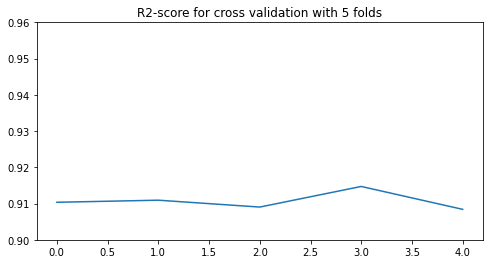

In [118]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(scores)
ax.set_title('R2-score for cross validation with 5 folds');
ax.set_ylim(0.90, 0.96)

In [151]:
y_pred = classifier.predict(X_test)
df_y_pred = pd.DataFrame(y_pred, columns = ['prediction'])
df_y_pred.head()

,prediction
0,0
1,0
2,0
3,0
4,0


<AxesSubplot:>

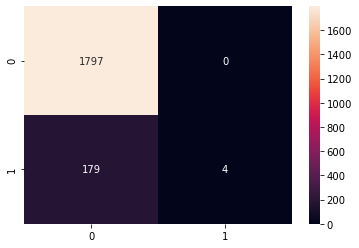

In [156]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
# True values on the vertical axis, predicted values on the horizontal one

In [138]:
result.value_counts()

prediction
0             1976
1                4
dtype: int64

In [139]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', class_weight='balanced') # instanciation of Object
%time svm.fit(X_train, y_train) # if data need to be flattered, use insteda np.array(X_train or y_train).ravel()
%time svm.score(X_test, y_test)

CPU times: user 3.47 s, sys: 121 ms, total: 3.59 s
Wall time: 3.63 s
CPU times: user 379 ms, sys: 0 ns, total: 379 ms
Wall time: 379 ms


0.9065656565656566

#### Naive Bayes Model

In [147]:
import sklearn.naive_bayes as nb
from sklearn.naive_bayes import GaussianNB

model = nb.GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [148]:
model.score(X_train, y_train)

0.10826174835775644

In [149]:
model.score(X_test, y_test)

0.10707070707070707

In [ ]:
# The gaussian model is inadequate, due to the non-gaussian distribution of data

In [145]:

from sklearn.naive_bayes import MultinomialNB

naivebayes = MultinomialNB()
naivebayes.fit(abs(X_train), abs(y_train))

MultinomialNB()

In [146]:
score_NB_train = naivebayes_fit.score(abs(X_train), abs(y_train))
score_NB_test = naivebayes_fit.score(abs(X_test), abs(y_test))

print("The score for the train set with Naive Bayes (Multinomial NB) is : \n{}".format(score_NB_train))
print("The score for the test set with Naive Bayes (Multinomial NB) is : \n{}".format(score_NB_test))

The score for the train set with Naive Bayes (Multinomial NB) is : 
0.9075290550783224
The score for the test set with Naive Bayes (Multinomial NB) is : 
0.9075757575757576
